# Exercise: Explore the CT images of a human brain


In [48]:
# Import the necessary evil
import xarray
import matplotlib.pyplot as plt

In [107]:
# From https://en.wikipedia.org/wiki/Hounsfield_scale
# (Values simplified modified to form a continuous range)

DENSITIES = {
    "air": (-1000, -900),
    "fat": (-100, -50),
    "fluid": (-50, 20),
    "white": (20, 30),
    "grey": (30, 50),
    "soft": (50, 300),
    "bone": (300, 1900),
    "heavy": (1900, 30000)
}

In [98]:
# Read the data
input_path = "../data/data.nc"
data = xarray.load_dataarray(input_path)

### Question 1: Look at the values present in the dataset. Is there anything fishy about them?

Hint: Look at the table of Hounsfield units for typical materials. Compare it with a histogram of values present in the dataset.

See https://docs.xarray.dev/en/stable/generated/xarray.plot.hist.html

(array([8.9666880e+06, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.6882283e+07, 1.8172483e+07, 4.5611430e+06, 5.6398300e+05,
        1.6249100e+05, 9.8449000e+04, 7.1925000e+04, 5.4834000e+04,
        4.5577000e+04, 4.1303000e+04, 3.9981000e+04, 4.0448000e+04,
        4.6453000e+04, 7.4256000e+04, 2.1737800e+05, 7.7443400e+05,
        2.1423770e+06, 4.1543070e+06, 4.8739730e+06, 2.8232310e+06,
        9.1881700e+05, 2.4773700e+05, 1.1514900e+05, 9.5011000e+04,
        9.1575000e+04, 9.7591000e+04, 1.0301800e

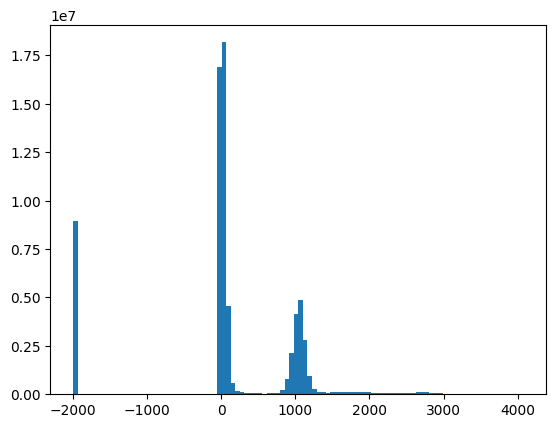

In [99]:
data.plot.hist(bins=100)  # No air, but a lot of values around -2000

In [100]:
data = data - 1000

### Question 2: Find the total volume of the head

Please ignore any boundaries etc., just accept any physiologically reasonable values. And use the coordinate dimensions which are stored in... a reasonable length unit ;-)

In [101]:
# Find the voxel volume (checking that the axes are linear)
data["y"].diff("y")


<xarray.DataArray 'y' (y: 511)>
array([0.49218801, 0.49218801, 0.49218801, 0.49218801, 0.49218801,
       0.49218801, 0.49218801, 0.49218801, 0.49218801, 0.49218801,
       0.49218801, 0.49218801, 0.49218801, 0.49218801, 0.49218801,
       0.49218801, 0.49218801, 0.49218801, 0.49218801, 0.49218801,
       0.49218801, 0.49218801, 0.49218801, 0.49218801, 0.49218801,
       0.49218801, 0.49218801, 0.49218801, 0.49218801, 0.49218801,
       0.49218801, 0.49218801, 0.49218801, 0.49218801, 0.49218801,
       0.49218801, 0.49218801, 0.49218801, 0.49218801, 0.49218801,
       0.49218801, 0.49218801, 0.49218801, 0.49218801, 0.49218801,
       0.49218801, 0.49218801, 0.49218801, 0.49218801, 0.49218801,
       0.49218801, 0.49218801, 0.49218801, 0.49218801, 0.49218801,
       0.49218801, 0.49218801, 0.49218801, 0.49218801, 0.49218801,
       0.49218801, 0.49218801, 0.49218801, 0.49218801, 0.49218801,
       0.49218801, 0.49218801, 0.49218801, 0.49218801, 0.49218801,
       0.49218801, 0.49218801, 0.49218801, 0.49218801, 0.49218801,
       0.49218801, 0.49218801, 0.49218801, 0.49218801, 0.49218801,
       0.49218801, 0.49218801, 0.49218801, 0.49218801, 0.49218801,
       0.49218801, 0.49218801, 0.49218801, 0.49218801, 0.49218801,
       0.49218801, 0.49218801, 0.49218801, 0.49218801, 0.49218801,
       0.49218801, 0.49218801, 0.49218801, 0.49218801, 0.49218801,
...
       0.49218801, 0.49218801, 0.49218801, 0.49218801, 0.49218801,
       0.49218801, 0.49218801, 0.49218801, 0.49218801, 0.49218801,
       0.49218801, 0.49218801, 0.49218801, 0.49218801, 0.49218801,
       0.49218801, 0.49218801, 0.49218801, 0.49218801, 0.49218801,
       0.49218801, 0.49218801, 0.49218801, 0.49218801, 0.49218801,
       0.49218801, 0.49218801, 0.49218801, 0.49218801, 0.49218801,
       0.49218801, 0.49218801, 0.49218801, 0.49218801, 0.49218801,
       0.49218801, 0.49218801, 0.49218801, 0.49218801, 0.49218801,
       0.49218801, 0.49218801, 0.49218801, 0.49218801, 0.49218801,
       0.49218801, 0.49218801, 0.49218801, 0.49218801, 0.49218801,
       0.49218801, 0.49218801, 0.49218801, 0.49218801, 0.49218801,
       0.49218801, 0.49218801, 0.49218801, 0.49218801, 0.49218801,
       0.49218801, 0.49218801, 0.49218801, 0.49218801, 0.49218801,
       0.49218801, 0.49218801, 0.49218801, 0.49218801, 0.49218801,
       0.49218801, 0.49218801, 0.49218801, 0.49218801, 0.49218801,
       0.49218801, 0.49218801, 0.49218801, 0.49218801, 0.49218801,
       0.49218801, 0.49218801, 0.49218801, 0.49218801, 0.49218801,
       0.49218801, 0.49218801, 0.49218801, 0.49218801, 0.49218801,
       0.49218801, 0.49218801, 0.49218801, 0.49218801, 0.49218801,
       0.49218801])
Coordinates:
  * y        (y) float64 -125.3 -124.8 -124.3 -123.8 ... 124.3 124.8 125.3 125.8

In [102]:
voxel_volume = abs(float(data["x"].diff("x")[0]) * float(data["y"].diff("y")[0]) * float(data["z"].diff("z")[0]))
voxel_volume


0.15140564617484087

In [103]:
# Find the voxels that are at least as dense as fat and at most as dense as bone and count them
head_count = int(data.where((data > DENSITIES["fat"][0]) & (data < DENSITIES["bone"][1])).count())
head_count

18057609

In [104]:
head_count * voxel_volume

2734023.959017622

### Question 3: Find the proportion of various materials in the whole picture (and in the head)

Note that the images are a bit noisy and the values are only approximate.

In [115]:
def print_proportions(data):
    head_count = int(data.where((data > DENSITIES["fat"][0]) & (data <= DENSITIES["bone"][1])).count())
    for material in ["fat", "fluid", "white", "grey", "soft", "bone"]:
        limits = DENSITIES[material]
        material_count = int(data.where((data > limits[0]) & (data <= limits[1])).count())
        material_percent = material_count / head_count * 100
        print(f"{material} ({limits[0]} to {limits[1]}): {material_percent} %")

print_proportions(data)

fat (-100 to -50): 6.52669177641244 %
fluid (-50 to 20): 21.09164931691694 %
white (20 to 30): 4.282496711586081 %
grey (30 to 50): 9.13018973846519 %
soft (50 to 300): 45.082994727573585 %
bone (300 to 1900): 13.885977729045768 %


### Question 4: Plot the n-th image of a slice in the x,y plane

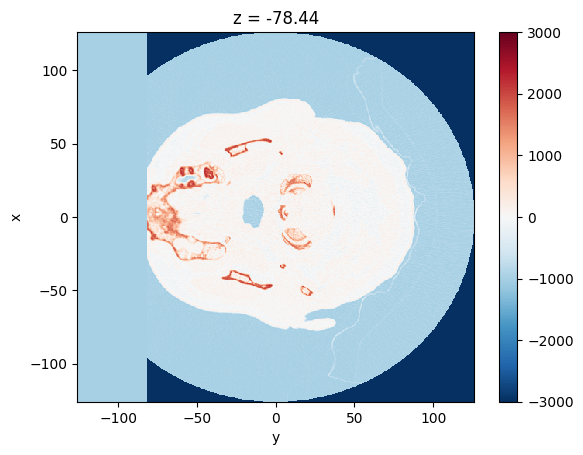

In [108]:
n = 5
data.isel(z=n).plot()

Now try to imitate a "proper" radiological image by selecting an appropriate colorscale and value boundaries.

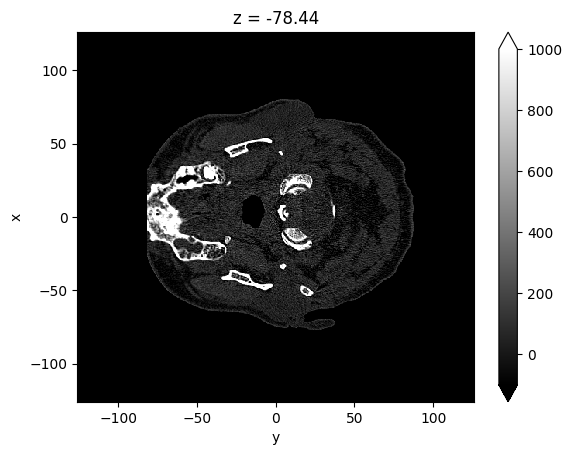

In [120]:
def physio_plot(slice):
    slice.plot(cmap="gist_gray", vmin=-100, vmax=1000)

slice = data.isel(z=n)
physio_plot(slice)

### Question 5: Find the "z" plane which contains the highest amount of bone voxels

In [118]:
is_bone = (data > DENSITIES["bone"][0]) & (data < DENSITIES["bone"][1])

idx = is_bone.sum(["x", "y"]).idxmax()
idx

<xarray.DataArray 'z' ()>
array(-49.6875)

Plot the slice...

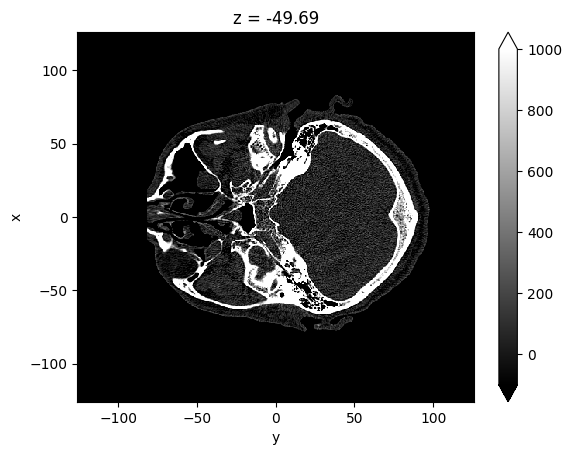

In [121]:
slice = data.sel(z=idx)
physio_plot(slice)

### Question 6: Create an image with one plot per each dimension (again, highest bone content)


In [127]:
def find_max_idx(data, axis):
    is_bone = (data > DENSITIES["bone"][0]) & (data < DENSITIES["bone"][1])
    dims = list({"x","y", "z"} - {axis})
    return is_bone.sum(dims).idxmax()

In [128]:
def physio_plot2(data, axis, value, ax):
    slice = data.sel(**{axis: value})
    slice.plot(cmap="gist_gray", vmin=-100, vmax=1000, ax=ax)


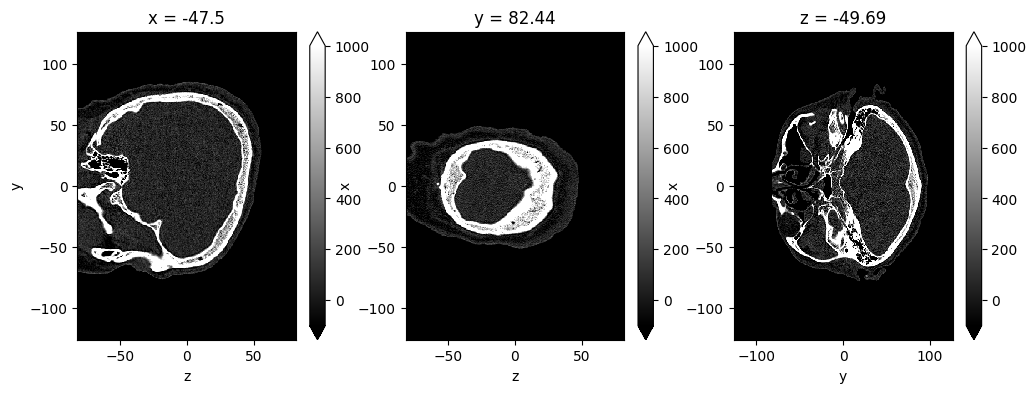

In [129]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
for i, axis in enumerate(["x", "y", "z"]):
    idx = find_max_idx(data, axis)
    physio_plot2(data, axis, idx, ax[i])